In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

# S&P500 sentiment-based robo adviser 

The Idea:
    
Ever since the start of organized markets, the idea of Market Timing has been very tempting. If one would buy when the price is low and sell when it's high, rates of return could be amplified greatly and - with a use of short selling - could be obtained even in the times of market downturn. One of the approaches to time the market is buying "fear" and selling "greed". One could argue that markets are constantly overreacting amid a chronic information asymmetry that leads to extrapolation of "known" and "present". Indeed, the volatility of S&P500 far exceeds volatility of earnings of underlying companies, not to mention the GDP (which in turn is the base for earnings in a longer term). When the flow of news and data is supportive, investors can extrapolate this into the future, leading to excessive valuations whereas negative news flow can depress valuations too much. Sentiment based speculator would like to short sell in the first situation and buy in the second. There are many challenges with this approach but for now let’s start with a perfect scenario: Sentiment Index being an ideal sine wave and known only to this speculator with the Index lows and highs corresponding to local lows and highs of the S&P500. All he would need to do is to open a long position when a green line is reached and flip it to short when the SI arrives at the red line (see: Chart 1)

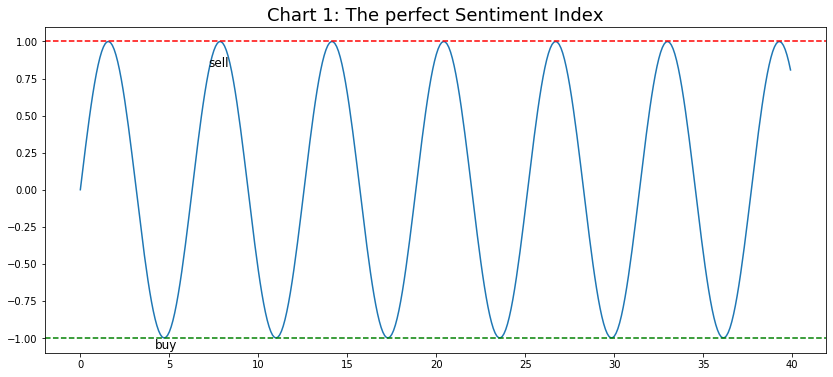

In [2]:
plt.figure(figsize=(14,6))
x = np.arange(0,40,0.1) 
SenitmentIndex = np.sin(x)
plt.plot(x,SenitmentIndex)
plt.axhline(y=1, ls="--", color="red") 
plt.axhline(y=-1, ls="--", color="green")
plt.title("Chart 1: The perfect Sentiment Index", fontsize=18)
plt.text(4.2,-1.07, "buy", fontsize=12)
plt.text(7.2,0.83, "sell", fontsize=12)
plt.show()

In [8]:
R=pd.read_excel("bullbeartest.xlsx",sheet_name=1,index_col=0)

The first challenge here is to measure market sentiment – something that theoretically could be very difficult to measure at all. However, since the idea of market sentiment is not new, there’ve been various attempts at doing this. One popular approach is to survey investors and one famous survey is called Weekly Sentiment Survey and is conducted by American Association of Individual Investors. The survey results is a number – difference between investors being bullish and those being bearish. Let’s take a look at it. 

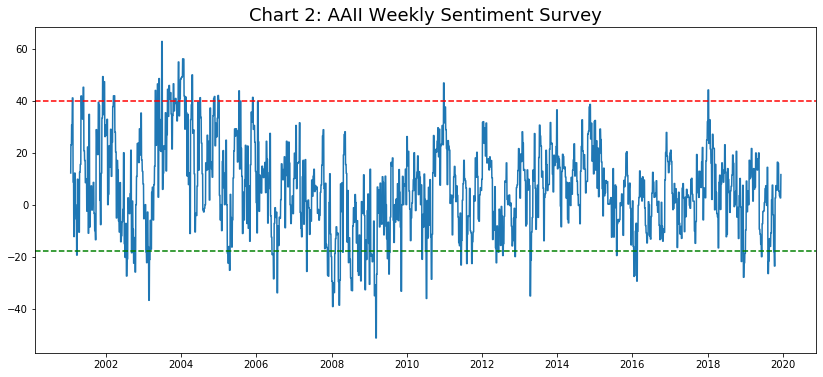

In [11]:
plt.figure(figsize=(14,6))
plt.plot(R.BullBear)
plt.axhline(y=40, ls="--", color="red") 
plt.axhline(y=-18, ls="--", color="green")
plt.title("Chart 2: AAII Weekly Sentiment Survey", fontsize=18)
plt.show()

By the nature of the survey the time series is stationary but the range of the outcome changes slightly over time. Clearly we there’s no absolute minimum and maximum point that’s being revisited but the local lows and highs are set at different levels. If we assume that we would take a long position at the oversold (green) line and either close it or reverse it to short at the overbought (red) line (at the open of the next day following the signal) we can manipulate the lines to see if we can achieve better results than a buy and hold strategy. At levels of -18 and +40 these returns are indeed better than the market but: a) the amount of signals has dropped towards the end of the data-range and b) this result could not be replicated into the future. The results can be seen on the chart. 

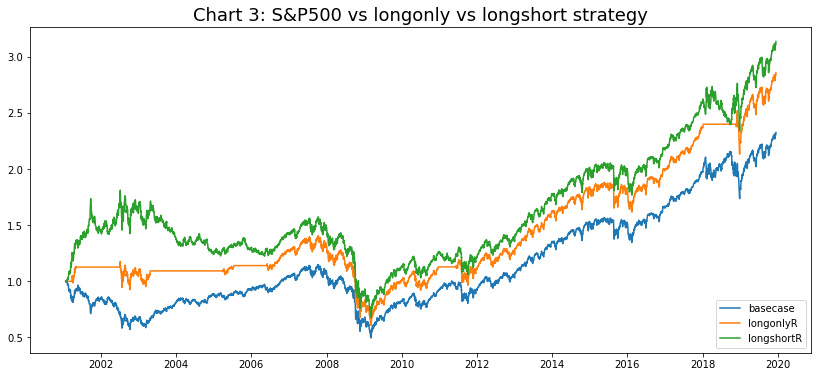

In [20]:
plt.figure(figsize=(14,6))
plt.plot(R.basecase)
plt.plot(R.longonlyR)
plt.plot(R.longshortR)
plt.legend(R.columns[-3:],loc="lower right")
plt.title("Chart 3: S&P500 vs longonly vs longshort strategy", fontsize=18)
plt.show()

We can see that using just this one survey we were able to achieve better results – not only in case of returns but also limiting the downside. However, this results is very prone to the hindsight bias and we should try and improve it. The approach that I propose is to consider a vector of sentiment indices and look for a corresponding vector (say X) of weights (that could be >=0 and should sum up to 1) that would maximize a certain outcome (preferably return although it could also take into account volatility or downside volatility). Ideally we would be looking for 4 “signal” levels of the Composite Sentiment Index (being weighted average of standardized values of indices from vector X): buy, close buy, sell and close sell. 

The next step could be finding if smoothing the indices from a vector X using moving averages (and thus eliminating excess volatility) could improve the results even more. Therefore we would obtain anther vector (say M) of length=len(X) where a degree of smoothing would be m>=1. 

There are many potential challenges in this project. The first one is availability of data and length of time series. The other is the timing of data releases that should be ideally stacked together and not too distant from the time of opening of the position. The ultimate challenge obviously is to find a model for finding optimal sets of variables from vectors X and M. Surely more challenges will arise during the execution phase of the project. 
